Jupyter Notebook to generate corrected axon+myelin image after correcting the myelin mask.


In [193]:
import numpy as np
from skimage import io
from scipy.misc import imread, imsave
import os
import imageio
import json
from skimage import transform
from skimage.filters import gaussian
import matplotlib.pyplot as plt
from shutil import copy
%matplotlib inline

In [186]:
def add_additive_gaussian_noise(img,mu=0,sigma=10):

    # Generate random gaussian noise with specified mean and sigma values
    noise = np.random.normal(mu, sigma, img.shape)
    
    # Add generated noise to input image
    img_noise = np.add(img,noise)

    # Clip noisy image between 0-255
    img_noise[img_noise < 0] = 0
    img_noise[img_noise > 255] = 255

    return img_noise.astype(np.uint8)

In [187]:
def add_multiplicative_gaussian_noise(img,mu=1,sigma=0.05):

    # Generate random gaussian noise with specified mean and sigma values
    noise = np.random.normal(mu, sigma, img.shape)
    
    # Add generated noise to input image
    img_noise = np.multiply(img,noise)

    # Clip noisy image between 0-255
    img_noise[img_noise < 0] = 0
    img_noise[img_noise > 255] = 255

    return img_noise.astype(np.uint8)

In [188]:
def change_illumination(img,value_percentage=0.2):

    # Add generated noise to input image
    img_noise = img+(value_percentage*255)

    # Clip noisy image between 0-255
    img_noise[img_noise < 0] = 0
    img_noise[img_noise > 255] = 255

    return img_noise.astype(np.uint8)

In [179]:
from AxonDeepSeg.apply_model import axon_segmentation

In [189]:
path_img = '/Users/rudinakaprata/Documents/Aldo/axondeepseg/AxonDeepSeg/data_test/image.png'
img = imageio.imread(path_img)
path_folder, file_name = os.path.split(path_img)


model_name = 'default_SEM_model_v1'
path_model = os.path.join('..','AxonDeepSeg','models',model_name)
path_configfile = os.path.join(path_model,'config_network.json')
with open(path_configfile, 'r') as fd:
    config_network = json.loads(fd.read())

In [195]:
values = np.linspace(0,0.5,11)

for value_percentage in values:
    
    # Generate and save noisy image
    img_noise = change_illumination(img,value_percentage)
    file_name = 'image_' + str(int(value_percentage*100)) + '.png'
    directory_name = 'image_' + str(int(value_percentage*100))
    os.makedirs(os.path.join(path_folder,directory_name))
    copy(os.path.join(path_folder,'pixel_size_in_micrometer.txt'), os.path.join(path_folder,directory_name))
    imageio.imwrite(os.path.join(path_folder,directory_name,file_name),img_noise)
    
    # Segment noisy image with AxonDeepSeg
    path_testing = os.path.join(path_folder,directory_name)
    prediction = axon_segmentation(path_testing, file_name, path_model, config_network,verbosity_level=0)
    
    

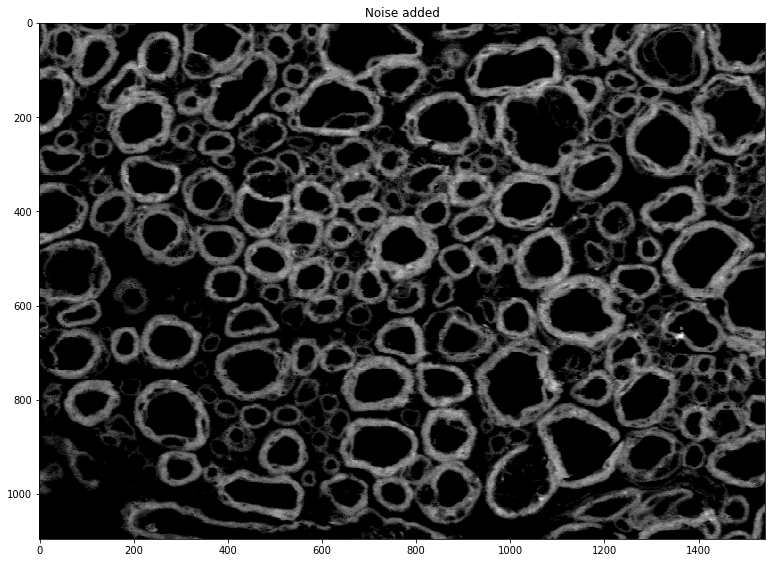

In [160]:
img_noise = change_illumination(img,-0.3)
plt.figure(figsize=(13,10))
plt.title('Noise added')
plt.imshow(img_noise,cmap='gray')
plt.show();

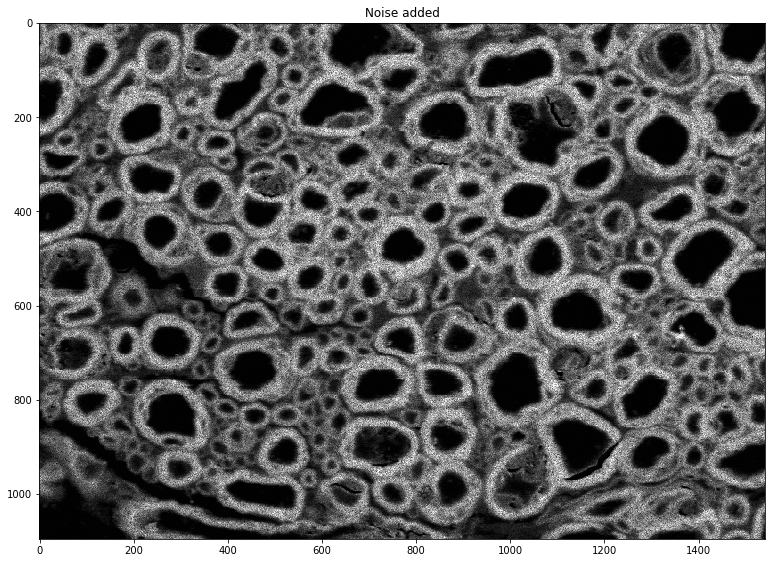

In [149]:
path_img = '/Users/rudinakaprata/Documents/Aldo/axondeepseg/AxonDeepSeg/data_test/image.png'
img = imageio.imread(path_img)
img_noise = add_multiplicative_gaussian_noise(img,mu=1,sigma=0.2)
plt.figure(figsize=(13,10))
plt.title('Noise added')
plt.imshow(img_noise,cmap='gray')
plt.show();

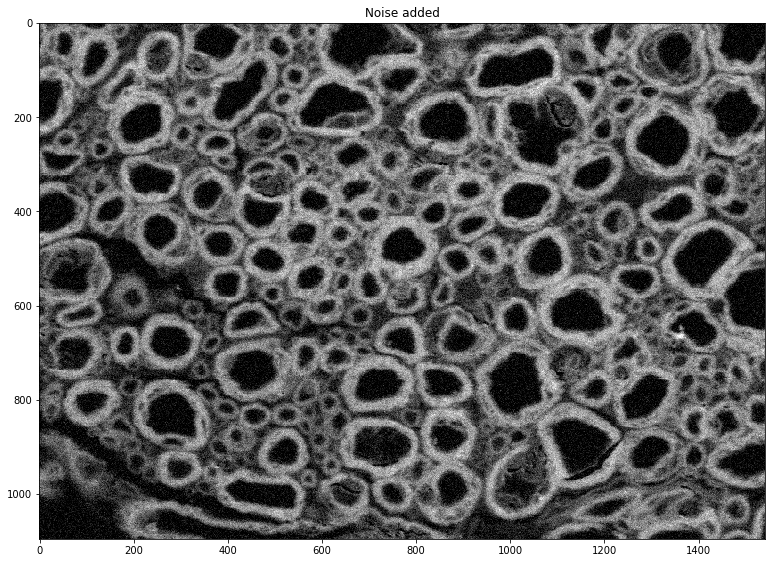

In [142]:
path_img = '/Users/rudinakaprata/Documents/Aldo/axondeepseg/AxonDeepSeg/data_test/image.png'
img = imageio.imread(path_img)
img_noise = add_additive_gaussian_noise(img,mu=0,sigma=20)
plt.figure(figsize=(13,10))
plt.title('Noise added')
plt.imshow(img_noise,cmap='gray')
plt.show();

In [42]:
path_img = '/Users/rudinakaprata/Documents/Aldo/axondeepseg/AxonDeepSeg/data_test/image.png'
img = imageio.imread(path_img)

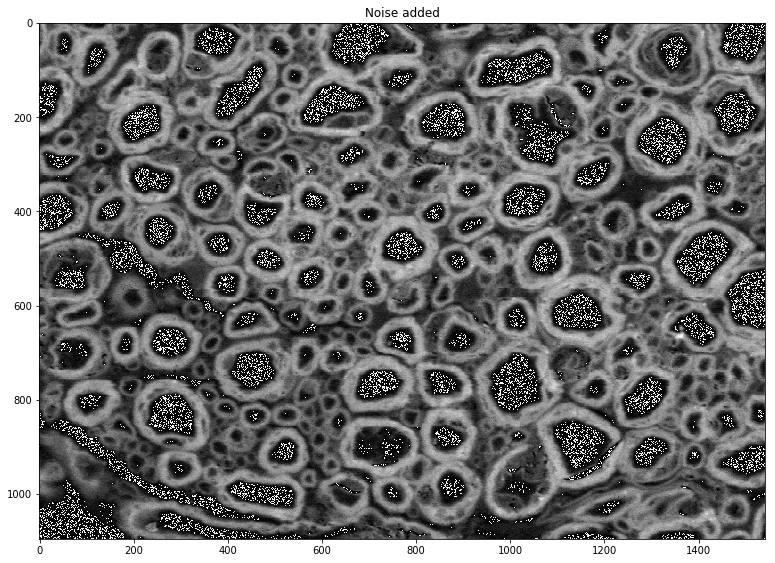

In [104]:
img_noise,noise = add_additive_gaussian_noise(img,mu=0,sigma=5)
plt.figure(figsize=(13,10))
plt.title('Noise added')
plt.imshow(img_noise,cmap='gray')
plt.show();